<a href="https://colab.research.google.com/github/Eric428-a/-LMS-Learning-Management-System/blob/master/2_1_9_b_Heart_Disease_Prediction_using_Random_Forest_Starter_Kit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Setting Up Your Environment

In [10]:
#Before diving into the project, ensure you have Python and the necessary libraries installed.

In [11]:
import numpy as np  # NumPy is imported as np, which is a widely used convention. It's commonly used for numerical computations and working with arrays.


In [12]:
import pandas as pd  # Pandas is imported as pd, another common convention. It's used for data manipulation and analysis, especially for tabular data.


In [13]:
import seaborn as sns  # Seaborn is imported as sns, a common convention. It's a statistical data visualization library built on top of Matplotlib, providing a higher-level interface.


In [14]:
import matplotlib.pyplot as plt  # Matplotlib is imported as plt, a standard convention. It's a comprehensive library for creating static, animated, and interactive visualizations in Python.


In [15]:
from sklearn.model_selection import train_test_split  # The train_test_split function is imported from scikit-learn, a widely used machine learning library in Python. It's used for splitting datasets into training and testing sets.


In [16]:
from sklearn.ensemble import RandomForestClassifier  # RandomForestClassifier is imported from scikit-learn. It's a popular ensemble learning method used for classification tasks.


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix  # accuracy_score and confusion_matrix are imported from scikit-learn. They're used for evaluating the performance of classification models.


In [18]:
from sklearn.preprocessing import StandardScaler  # StandardScaler is imported from scikit-learn. It's used for standardizing features by removing the mean and scaling to unit variance.


# 2. Data Acquisition

In [19]:
# The dataset for this project is available at the UCI Machine Learning Repository. You can download it directly from the website or use the following Python code to download it programmatically:


In [20]:
# URL for the dataset

In [21]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [22]:
# Column names based on the dataset documentation

In [23]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [24]:
# Loading the dataset using pandas read_csv function

In [25]:
df = pd.read_csv(url, names=columns)

In [26]:
#  Display the first few rows of the dataframe

In [27]:
print(df.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


# 3. Exploratory Data Analysis (EDA)

In [28]:
# EDA is crucial for understanding the dataset's characteristics and preparing it for modeling. We'll cover data visualization, statistical summaries, and data preprocessing.


In [31]:
#  let's visualize the distribution of age:

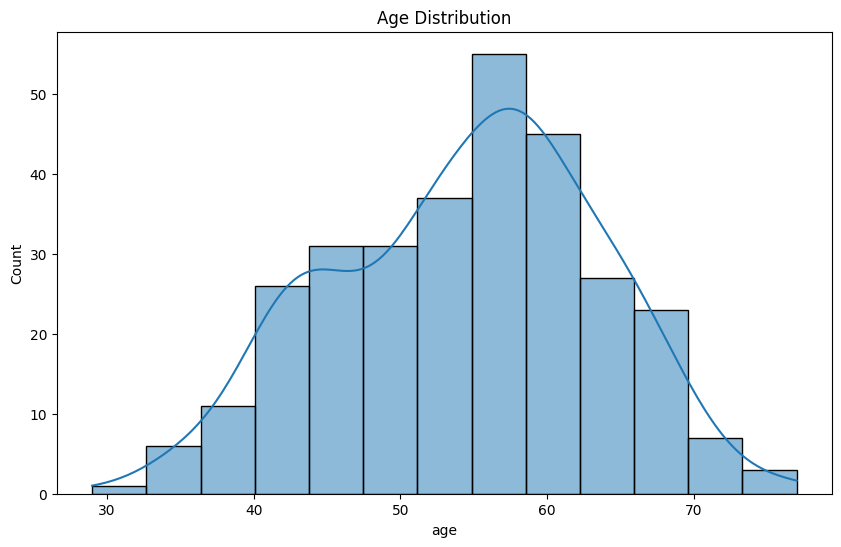

In [30]:
plt.figure(figsize=(10, 6)) # Creating a figure with a specified size
sns.histplot(df['age'], kde=True) # # Plotting the histogram of age with a kernel density estimate (KDE)
plt.title('Age Distribution') # # Adding a title to the plot
plt.show() # # Displaying the plot


In [32]:
#  let's visualize the relationship between maximum heart rate and heart disease

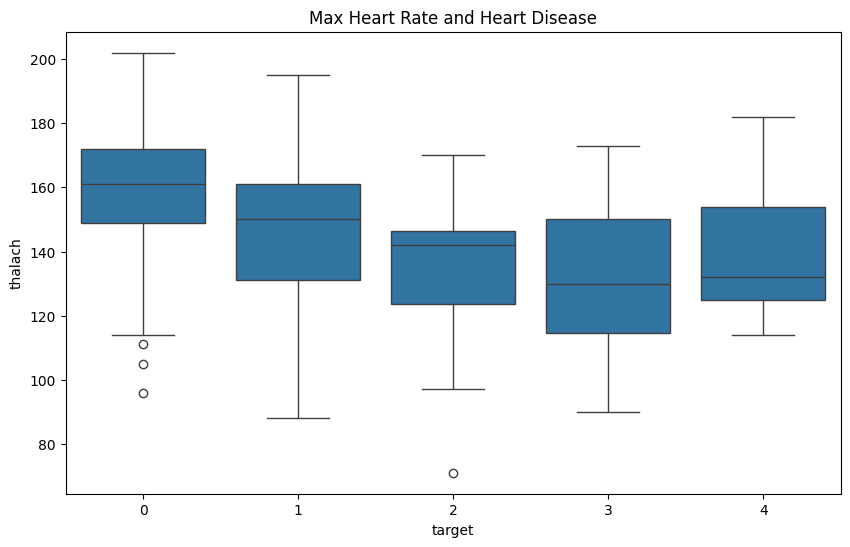

In [34]:
plt.figure(figsize=(10, 6))  # Creating a figure with a specified size
sns.boxplot(x='target', y='thalach', data=df)  # Plotting a boxplot of maximum heart rate (thalach) and heart disease (target)
plt.title('Max Heart Rate and Heart Disease')  # Adding a title to the plot
plt.show()  # Displaying the plot

In [35]:
# Statistical Summaries
# Understanding the central tendency, dispersion, and shape of the dataset's distribution.

In [36]:
print(df.describe())  # Displaying statistical summary of the dataset

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope      target  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.937294  
std      0.994971   22.875003 

In [38]:
# Data Preprocessing

In [39]:
# Replace '?' with NaN

In [40]:
df = df.replace('?', np.nan)  # Replacing '?' values with NaN

In [41]:
# Convert columns to numeric

In [42]:
df = df.apply(pd.to_numeric)  # Converting columns to numeric data type

In [43]:
# Fill missing values with the median

In [44]:
df.fillna(df.median(), inplace=True)  # Filling missing values with the median of each column

# 4. model Building

In [45]:
# Splitting the dataset into features and target variable

In [46]:
X = df.drop('target', axis=1)  # Extracting features by dropping the 'target' column

In [47]:
y = df['target']  # Target variable

In [48]:
# Encoding categorical variables

In [49]:
X = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)  # One-hot encoding categorical variables


In [50]:
# Feature scaling

In [51]:
scaler = StandardScaler()  # Initializing StandardScaler

In [52]:
X_scaled = scaler.fit_transform(X)  # Scaling the features

In [53]:
# Splitting the data into training and testing sets

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [55]:
# Initializing Random Forest classifier with 100 estimators

In [56]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [57]:
# Fitting the model

In [58]:
rf.fit(X_train, y_train)  # Training the Random Forest model

RandomForestClassifier(random_state=42)

In [59]:
# Model Evaluation and Interpretation
# Making predictions

In [60]:
y_pred = rf.predict(X_test)  # Making predictions on the test set

In [61]:
# Evaluating the model

In [62]:
print("Accuracy:", accuracy_score(y_test, y_pred))  # Calculating the accuracy of the model

Accuracy: 0.5245901639344263


In [63]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))  # Displaying the confusion matrix

Confusion Matrix:
 [[28  0  1  0  0]
 [ 7  1  4  0  0]
 [ 2  3  2  2  0]
 [ 0  4  2  1  0]
 [ 1  1  0  2  0]]


# 5. Model Evaluation and Interpretation

In [64]:
# Feature importance

In [65]:
importances = rf.feature_importances_

In [66]:
indices = np.argsort(importances)[::-1]  # Sorting feature importances in descending order

In [67]:
# Plotting feature importances

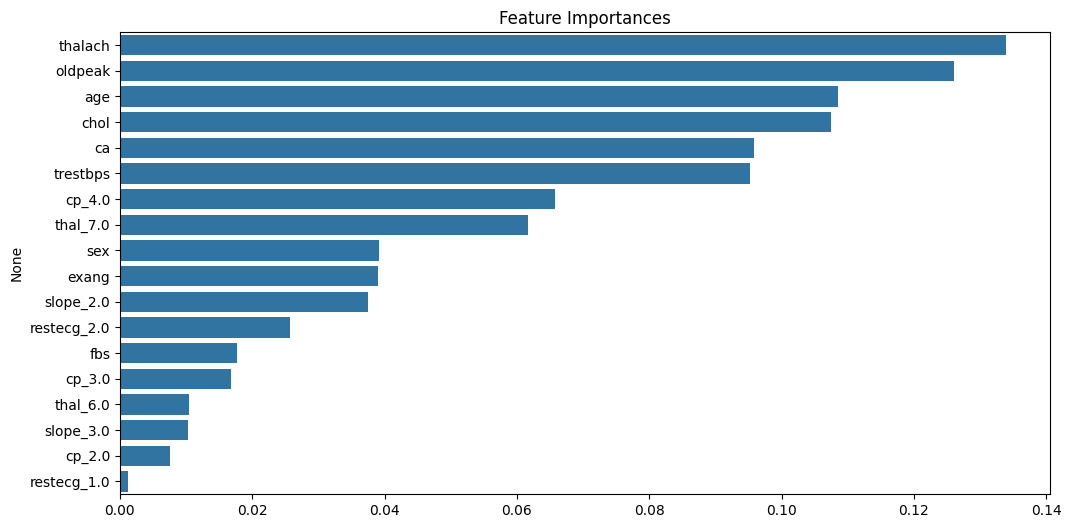

In [68]:
plt.figure(figsize=(12, 6))  # Creating a figure with a specified size
plt.title('Feature Importances')  # Adding a title to the plot
sns.barplot(x=importances[indices], y=X.columns[indices])  # Plotting feature importances
plt.show()  # Displaying the plot

In [69]:
# Save the dataset to a CSV file

In [70]:
df.to_csv('heart_disease_dataset.csv', index=False)